<a href="https://colab.research.google.com/github/IntroductionToAICW/CW/blob/main/algorithms/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

from google.colab import drive

import twitterAPI

#Import the dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_pickle("/content/drive/My Drive/dataset/valid_df.pkl")
df.head(5)

,text,labels,lang,NoHTML_text,ASCII_NoHTML_text,Lemma_NoSal_ASCII_NoHTML_text,NoSW_Lemma_NoSal_ASCII_NoHTML_text,afterProcess
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,en,#FollowFriday @France_Inte @PKuchly57 @Milipol...,for being top engaged members in my community ...,for be top engage member in my community this ...,engage member community week,engage member community week
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,en,@Lamb2ja Hey James! How odd :/ Please call our...,hey james how odd please call our contact cent...,hey james how odd please call our contact cent...,hey james odd contact centre able assist thanks,hey james odd contact centre able assist thanks
2,@DespiteOfficial we had a listen last night :)...,1,en,@DespiteOfficial we had a listen last night :)...,we had a listen last night as you bleed is an ...,we have a listen last night a you bleed be an ...,listen night bleed amaze track scotland,listen night bleed amaze track scotland
3,@97sides CONGRATS :),1,es,@97sides CONGRATS :),congrats,congrats,congrats,congrats
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,en,yeaaaah yippppy!!! my accnt verified rqst has...,yeaaaah yippppy my accnt verified rqst has suc...,yeaaaah yippppy my accnt verify rqst have succ...,yeaaaah yippppy accnt verify rqst succeed blue...,yeaaaah yippppy accnt verify rqst succeed blue...


#Split the dataset

In [4]:
X = list(df["afterProcess"])
y = df["labels"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Build the model

In [5]:
classifier = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', LogisticRegressionCV(cv = 5,
                                                  max_iter=300,
                                                  verbose= 3,
                                                  scoring = 'accuracy',
                                                  n_jobs= -1,
                                                  random_state = 0                         
                     ))])

#Train the model

In [6]:
classifier.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.8s finished


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=False, fit_intercept=True,
                                      

#Accuracy on training set

In [7]:
y_pred = classifier.predict(x_train)

In [8]:
accuracy_score(y_train, y_pred)

0.8346994535519126

#Testing on test set

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7281972265023112

#Plot the confusion matrix 

In [11]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1118  447]
 [ 435 1245]]
Normalized confusion matrix
[[0.71 0.29]
 [0.26 0.74]]


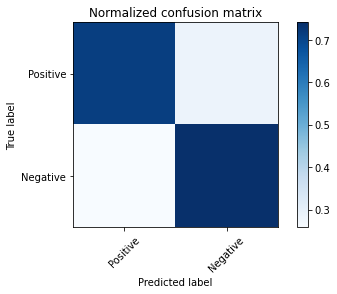

In [12]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cm)
#normalised confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
# check that the cm is labelled correctly
plot_confusion_matrix(cm_normalized, ['Positive', 'Negative'], title='Normalized confusion matrix')
plt.show()

#Connection and test with Twitter API

In [13]:
search_words = "#trump"
date_since = "2020-11-01"
number_of_tweets = 10
tweets = twitterAPI.main(search_words, date_since, number_of_tweets)

In [14]:
tweetsA = [tweet.text for tweet in tweets]
tweetsA.append("I love love love love")
tweetsA.append("I hate you hate hate")

In [15]:
y_test = classifier.predict(tweetsA)

In [16]:
for i in y_test:
  if i == 0:
    print("Negative")
  else:
    print("Positive")

Negative
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
